In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, load_wine, load_diabetes
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC, SVR, LinearSVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score
%matplotlib inline

In [2]:
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [3]:
df = pd.DataFrame(wine['data'], columns = wine['feature_names'])
df['target'] = wine['target']

In [4]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

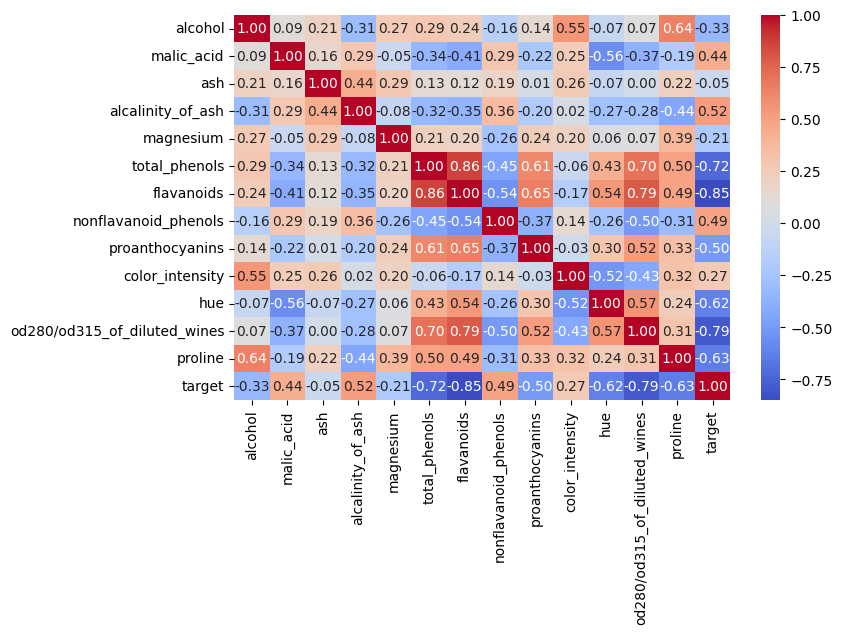

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", fmt=".2f", annot=True)
plt.show()

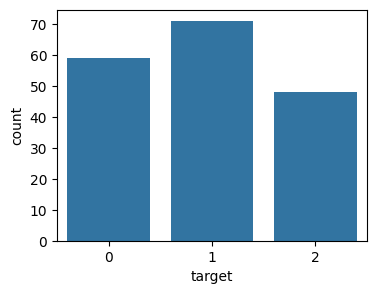

In [9]:
plt.figure(figsize=(4,3))
sns.countplot(x = df["target"])
plt.show()

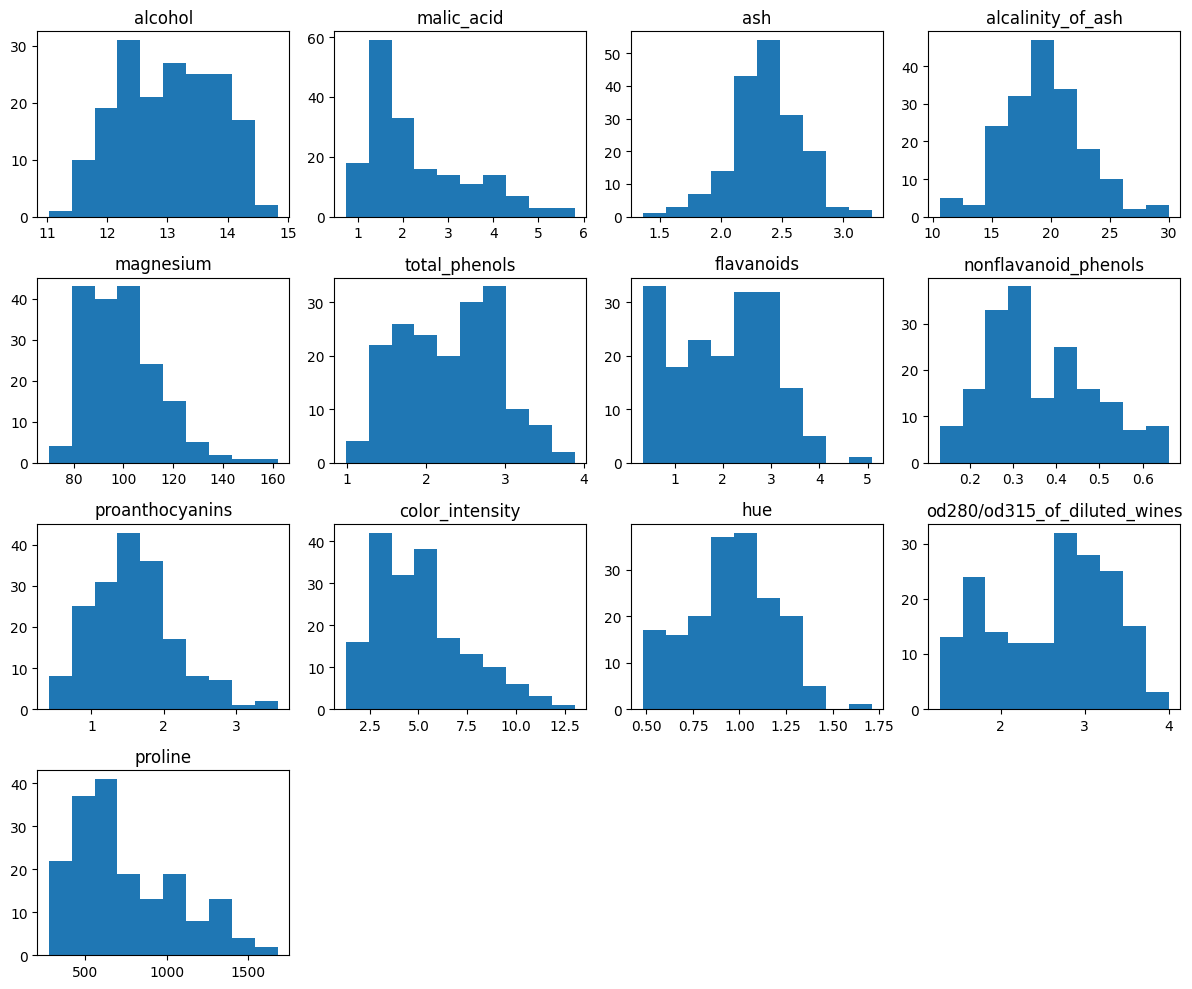

In [10]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12,10))
axes = ax.ravel()
for i, col in enumerate(df.select_dtypes(include="float64").columns):
    axes[i].hist(df[col])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Linear SVM classification  
The two classes can clearly be separated easily with a straight line (they are linearly separable)  

In [11]:
X = df.select_dtypes(include="float64")
y = df["target"]==2 # binary classification - onl predicting class 2 or not

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(142, 13) (142,) (36, 13) (36,)


In [13]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("Linear SVC", LinearSVC(C=1, loss="hinge")) # dual=False for efficiency (if no. of instances >  no. of features)
    # ("SVC", SVC(kernel="linear", C=1)),# or we can use SVC(kernel="linear", C=1, loss="hinge"), but this is slower with large training sets
    # ("SGD_SVC", SGDClassifier(loss="hinge", alpha=0.01)) # or for large datasets that donot fit into memory
])

In [14]:
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Linear SVC', LinearSVC(C=1, loss='hinge'))])

In [15]:
y_pred = svm_clf.predict(X_test)

In [16]:
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Test recall: {recall_score(y_test, y_pred)}")
print(f"Test precision: {precision_score(y_test, y_pred)}")
print(f"Test f1-score: {f1_score(y_test, y_pred)}")

Test accuracy: 0.9722222222222222
Test recall: 1.0
Test precision: 0.8888888888888888
Test f1-score: 0.9411764705882353


In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)

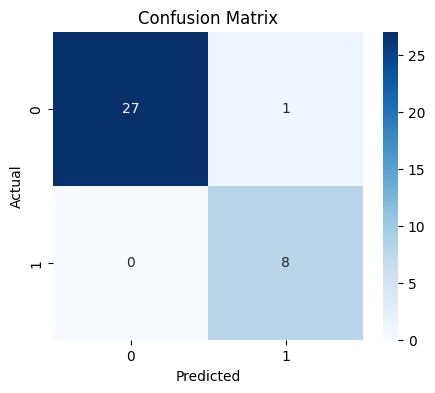

In [18]:
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, cmap="Blues", fmt="d", annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Non Linear Classification  


### Handling nonlinear datasets by adding PolynomialFeatures  

In [19]:
moon = make_moons()
moon_df = pd.DataFrame(moon[0], columns=['x1', 'x2'])
moon_df['target'] = moon[1]
moon_df.shape

(100, 3)

In [20]:
moon_df.head()

,x1,x2,target
0,-0.572117,0.820172,0
1,1.926917,0.124733,1
2,0.327699,-0.240278,1
3,0.903977,-0.495379,1
4,0.623490,0.781831,0


In [21]:
moon_df['target'].value_counts() # binary classification

target
0    50
1    50
Name: count, dtype: int64

In [22]:
moon_df_0 = moon_df.loc[moon_df["target"] == 0]
moon_df_1 = moon_df.loc[moon_df["target"] == 1]

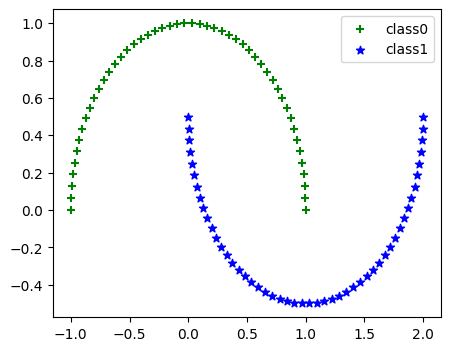

In [23]:
plt.figure(figsize=(5,4))
plt.scatter(moon_df_0["x1"], moon_df_0["x2"], marker="+", color="g", label="class0")
plt.scatter(moon_df_1["x1"], moon_df_1["x2"], marker="*", color="b", label="class1")
plt.legend(loc="best")
plt.show()

In [24]:
X_moon = moon_df[["x1", "x2"]]
y_moon = moon_df["target"]

X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_moon, y_moon, test_size=0.2, random_state=42)
print(X_train_moon. shape, y_train_moon.shape, X_test_moon.shape, y_test_moon.shape)

(80, 2) (80,) (20, 2) (20,)


The data is not linearly seperable, but could be seperated via polynomial kernel.  

In [25]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=1, loss="hinge"))
])

In [26]:
polynomial_svm_clf.fit(X_train_moon, y_train_moon)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=1, loss='hinge'))])

In [27]:
y_pred_poly = polynomial_svm_clf.predict(X_test_moon)

In [28]:
print(f"Accuracy: {accuracy_score(y_test_moon, y_pred_poly)}")
print(f"Recall: {recall_score(y_test_moon, y_pred_poly)}")
print(f"Precision: {precision_score(y_test_moon, y_pred_poly)}")
print(f"F1-score: {f1_score(y_test_moon, y_pred_poly)}")

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1-score: 1.0


### Kernel trick -  Using SVC(kernel="poly") Preffered, saves us from explosion of features without adding them    

In [29]:
# if your model is overfitting, reduce the polynomial degree. Conversely, if it is underfitting, increase the polynomial degree.
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=1)) # The hyperparameter coef0 controls how much the model is influenced by highdegree 
    # polynomials versus low-degree polynomials
])

In [30]:
poly_kernel_svm_clf.fit(X_train_moon, y_train_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, coef0=1, kernel='poly'))])

In [31]:
y_pred_poly_kernel = poly_kernel_svm_clf.predict(X_test_moon) # we get the same output using kernel trick instead of Polynomial features

In [32]:
print(f"Accuracy: {accuracy_score(y_test_moon, y_pred_poly_kernel)}")
print(f"Recall: {recall_score(y_test_moon, y_pred_poly_kernel)}")
print(f"Precision: {precision_score(y_test_moon, y_pred_poly_kernel)}")
print(f"F1-score: {f1_score(y_test_moon, y_pred_poly_kernel)}")

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1-score: 1.0


### Adding Similarity features -  Kernel Trick (using Guassian Radial Basis function(RBF))  
Another technique to tackle nonlinear problems is to add features computed using a similarity function that measures how much each instance resembles a particular landmark

In [33]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=1)) # Gamma acts like a regularization hyperparameter. C also acts as a regularization parameter 
    # (decrease C for more regularization, to avoid overfitting).
])

In [34]:
rbf_kernel_svm_clf.fit(X_train_moon, y_train_moon)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=1, gamma=5))])

In [35]:
y_pred_rbf_kernel = rbf_kernel_svm_clf.predict(X_test_moon)

In [36]:
print(f"Accuracy: {accuracy_score(y_test_moon, y_pred_poly_kernel)}")
print(f"Recall: {recall_score(y_test_moon, y_pred_poly_kernel)}")
print(f"Precision: {precision_score(y_test_moon, y_pred_poly_kernel)}")
print(f"F1-score: {f1_score(y_test_moon, y_pred_poly_kernel)}")

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1-score: 1.0


# SVM Regression  
Objective: Fit the model such that as many instances as possible lie on the street, while minimizing violations (instances outside the street).  
The width of the street is controlled by the epsilon (ϵ) hyperparameter.  

In [37]:
diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [38]:
df_diabetes = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df_diabetes["target"] = diabetes["target"]
df_diabetes.shape

(442, 11)

In [39]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [40]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [41]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


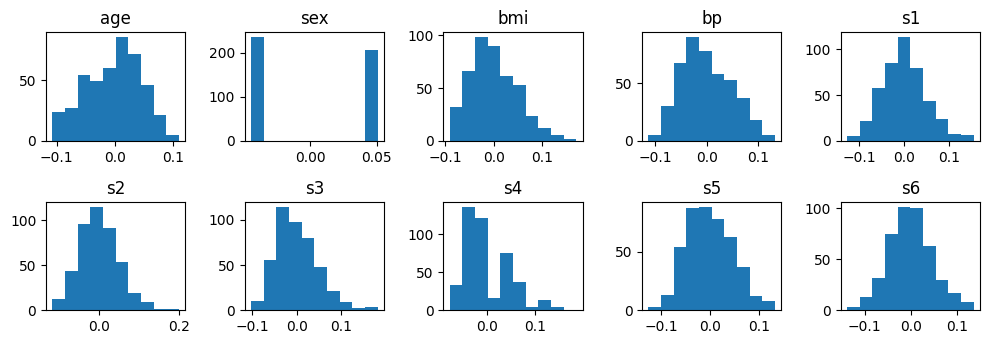

In [42]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(10,5))
axes = ax.ravel()
for i, col in enumerate(df_diabetes.columns):
    axes[i].hist(df_diabetes[col])
    axes[i].set_title(col)
for j in range(i, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [43]:
y_diabetes = df_diabetes["target"]
X_diabetes = df_diabetes.drop(columns=["target"], axis = 1)
X_diabetes.shape, y_diabetes.shape

((442, 10), (442,))

Rule of Thumb : Only scale y if the model does math directly on y — like kernels, neural nets, or probabilistic models.

In [44]:
# Scale X and y
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_diabetes_scaled = scaler_x.fit_transform(X_diabetes)
# Scale target (reshape to 2D first, then ravel to 1D if needed)
y_diabetes_scaled = scaler_y.fit_transform(y_diabetes.values.reshape(-1,1)).ravel()

In [45]:
X_train_scaled_diabetes, X_test_scaled_diabetes, y_train_scaled_diabetes, y_test_scaled_diabetes = train_test_split(X_diabetes_scaled, y_diabetes_scaled, test_size=0.2, random_state=42)
print(X_train_scaled_diabetes.shape, y_train_scaled_diabetes.shape, X_test_scaled_diabetes.shape, y_test_scaled_diabetes.shape)

(353, 10) (353,) (89, 10) (89,)


### Using LinearSVR

In [46]:
svm_reg = LinearSVR(epsilon=1.5)

In [47]:
svm_reg.fit(X_train_scaled_diabetes, y_train_scaled_diabetes)

LinearSVR(epsilon=1.5)

In [48]:
y_pred_scaled_diabetes_linear = svm_reg.predict(X_test_scaled_diabetes)

In [49]:
# Inverse transform predictions and y_test scaled data for comparison
y_pred_diabetes_linear = scaler_y.inverse_transform(y_pred_scaled_diabetes_linear.reshape(-1,1)).ravel()
y_test_diabetes = scaler_y.inverse_transform(y_test_scaled_diabetes.reshape(-1,1)).ravel()

In [50]:
print(f"MSE: {mean_squared_error(y_test_diabetes, y_pred_diabetes_linear)}")
print(f"R2 score: {r2_score(y_test_diabetes, y_pred_diabetes_linear):.2f}")

MSE: 2989.4999094471223
R2 score: 0.44


R²=(1− (Total Sum of Squares i.e. variance of target)/Sum of Squared Residuals i.e.errors))   
Sum of Squared Residuals (SSR): how far your predictions are from the actual values.  
Total Sum of Squares (TSS): how far actual values are from their mean.  
R² ≈ 0.0: model is no better than guessing the mean.  
R² ≈ 1.0: perfect prediction.  
R² < 0.0: worse than a horizontal line.  
R² Between 0 and 1	Proportion of variance explained by the model (higher is better)

### Using SVR (kernel="rbf", "poly", "linear")

In [51]:
svm_kernel_linear_reg = SVR(kernel="linear", epsilon=1.5)
svm_kernel_poly_reg = SVR(kernel="poly", degree=2, coef0=1, C=1)
svm_kernel_rbf_reg = SVR(kernel="rbf", C=1)

##### Training Linear Kernel for SVR (Kernel Trick)

In [52]:
svm_kernel_linear_reg.fit(X_train_scaled_diabetes, y_train_scaled_diabetes)

SVR(epsilon=1.5, kernel='linear')

In [53]:
y_pred_scaled_diabetes_kernel_linear = svm_kernel_linear_reg.predict(X_test_scaled_diabetes)

In [54]:
# Inverse transform predictions and y_test scaled data for comparison
y_pred_diabetes_kernel_linear = scaler_y.inverse_transform(y_pred_scaled_diabetes_kernel_linear.reshape(-1,1)).ravel()

In [55]:
print(f"MSE: {mean_squared_error(y_test_diabetes, y_pred_diabetes_kernel_linear)}")
print(f"R2 score: {r2_score(y_test_diabetes, y_pred_diabetes_kernel_linear):.2f}")

MSE: 2995.517821384648
R2 score: 0.43


##### Training Poly Kernel for SVR (Kernel Trick)

In [56]:
svm_kernel_poly_reg.fit(X_train_scaled_diabetes, y_train_scaled_diabetes)

SVR(C=1, coef0=1, degree=2, kernel='poly')

In [57]:
y_pred_scaled_diabetes_kernel_poly = svm_kernel_poly_reg.predict(X_test_scaled_diabetes)

In [58]:
# Inverse transform predictions and y_test scaled data for comparison
y_pred_diabetes_kernel_poly = scaler_y.inverse_transform(y_pred_scaled_diabetes_kernel_poly.reshape(-1,1)).ravel()

In [59]:
print(f"MSE: {mean_squared_error(y_test_diabetes, y_pred_diabetes_kernel_poly)}")
print(f"R2 score: {r2_score(y_test_diabetes, y_pred_diabetes_kernel_poly):.2f}")

MSE: 2791.5563102638484
R2 score: 0.47


##### Training RBF Kernel for SVR (Kernel Trick)

In [60]:
svm_kernel_rbf_reg.fit(X_train_scaled_diabetes, y_train_scaled_diabetes)

SVR(C=1)

In [61]:
y_pred_scaled_diabetes_kernel_rbf = svm_kernel_rbf_reg.predict(X_test_scaled_diabetes)

In [62]:
# Inverse transform predictions and y_test scaled data for comparison
y_pred_diabetes_kernel_rbf = scaler_y.inverse_transform(y_pred_scaled_diabetes_kernel_rbf.reshape(-1,1)).ravel()

In [63]:
print(f"MSE: {mean_squared_error(y_test_diabetes, y_pred_diabetes_kernel_rbf)}")
print(f"R2 score: {r2_score(y_test_diabetes, y_pred_diabetes_kernel_rbf):.2f}")

MSE: 2520.7652288372215
R2 score: 0.52
